## Teoretiska frågor

**1. Beskriv kort hur en relationsdatabas fungerar.**

En relationsdatabas består i huvudsak av tabeller som innehåller data där varje tabell representerar en viss typ av information som t.ex. ordrar, lager, fakturor. Mellan tabellerna finns det relationer vilket bl.a. gör det möjligt att få ut data ifrån flera tabeller vid en och samma sökning. 
Varje tabell har en primärnyckel där en kolumns data måste vara unik. Med hjälp av denna kan relationer skapas med andra tabeller och deras sk. främmande nycklar. Främmande nycklar är kolumner där informationen motsvarar och kan kopplas till en primärnyckel i en annan tabell och på så vis upprätta en relation dem emellan.


**2. Vad menas med “CRUD”-flödet?**

CRUD står för de grundläggande operationerna som finns för en relationsdatabas.
De står för:   
Create - skapar rader med information i tabeller   
Read - läsa ut data ifrån tabeller   
Update - uppdatera information som finns i tabeller   
Delete - ta bort rader ur tabeller    


**3. Beskriv kort vad en “left join” och en “inner join” är. Varför använder man det?**

Left join:
Vid sammanforgning av tabeller så innebär left join att man tar med alla de rader som finns i den först angivna tabellen (vänstra) men i den andra tabellen (högra) tas endast de rader med som har matchande värden i den vänstra. Om information inte finns i högra tabellen men finns i den vänstra så kommer raderna tas med men kolumner som är unika för den andra tabellen kommer innehålla NULL-värden.
Inner Join:
Vid sammanfogning av tabeller så innebär inner join att man får ut de rader som har matchande värden i de båda tabellerna. Om en rad endast finns i en utav tabellerna så tas den inte med.
Joins används för att sammanfoga tabeller och ger möjligheten att plocka ut data ur flera tabeller i samma sökning.


**4. Beskriv kort vad indexering i SQL innebär.**

Indexering är ett sätt att hitta rader med information snabbare utan att behöva gå igenom varje rad för rad i databasen. En kolumn kan sättas som index och söker man sedan på information som bör finnas i en sådan kolumn så finns den i en sorterad struktur som är mycket snabbare att hitta värden i.
Samtidigt som indexering innebär ett snabbare sätt att hitta data på så innebär det att uppdateringar av information blir långsammare eftersom index också måste uppdateras med varje förändring så det lämpar sig inte att ha indexering på all typ av information.


**5. Beskriv kort vad en vy i SQL är.**

En vy är ett sätt att spara undan en SQL-fråga så att man istället för att skriva en lång och komplicerad fråga varje gång man behöver den så finns den istället att anropa. Det kan också vara bra med en vy då användare inte ska bör ha tillgång till all information i tabellerna utan bara viss data.


**6. Beskriv kort vad en lagrad procedur i SQL är.**

En lagrad procedur är SQL-kod som sparats/skapats för att kunna tillkallas i en annan SQL-kod, som ett litet program som kan anropas då man skriver SQL-satser. Proceduren sparas i databasen och blir därför mycket snabbare att använda än att skriva ut alla de raderna på vanligt sätt i SQL koden. Liksom med vyer så kan man sätta behörigheter att använda en lagrad procedur och därmed inte behöva ge användaren behörigheter till all information i tabellerna.

## Programmeringsuppgift  
Ge en deskriptiv sammanfattning över databasen AdventureWorks2022. Syftet är att
läsaren skall få en god överblick över datan som finns. Använd några visualiseringar för att demonstrera intressanta aspekter av datan.

In [1]:
# importerar moduler
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import seaborn.objects as so
import pyodbc
from sqlalchemy.engine import create_engine, URL
from sqlalchemy import MetaData, Table, inspect, text
plot = False

In [2]:
# Databaskoppling
SERVER = 'localhost'
DATABASE = 'AdventureWorks2022'

connection_string = f"Driver={{ODBC Driver 18 for SQL Server}};Server={SERVER};Database={DATABASE};Trusted_Connection=yes;Encrypt=no"
connection_url = URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})
engine = create_engine(connection_url)

### Beskriving av Databasen

Databasen Adventureworks2022 är en ralationsdatabas i SQL uppbyggd kring i huvudsak fem scheman: HumanResources, Person, Production, Purchasing och Sales.  
Den är strukturerad som en snowflake topologi och varje schema representerar olika delar i företaget Adventure Works Cycles verksamhet och innehåller allt ifrån 7 till 28 tabeller vardera. Tabellerna har sedan relationer till varandra genom nycklar och är normaliserade på ett icke-redundant sätt.  


In [3]:
# Visa scheman och antalet tabeller
query = """
SELECT 
    TABLE_SCHEMA AS SchemaNamn, 
    COUNT(*) AS AntalTabeller
FROM 
    information_schema.tables
WHERE 
    TABLE_SCHEMA NOT LIKE 'db%'
GROUP BY 
    TABLE_SCHEMA;
"""

schema_df = pd.read_sql(query, engine)
schema_df



,SchemaNamn,AntalTabeller
0,Sales,26
1,Person,15
2,Production,28
3,HumanResources,12
4,Purchasing,7


In [11]:
# Visa tabeller i t.ex. schemat Sales
query = """
SELECT TABLE_NAME AS Tabellnamn
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_SCHEMA = 'Sales';
"""

table_df = pd.read_sql(query, engine)
table_df

,Tabellnamn
0,SalesTaxRate
1,PersonCreditCard
2,SalesTerritory
3,vIndividualCustomer
4,vPersonDemographics
5,vSalesPerson
6,SalesTerritoryHistory
7,vSalesPersonSalesByFiscalYears
8,vStoreWithDemographics
9,vStoreWithContacts


In [5]:
# Visa kolumner i t.ex. tabellen SalesOrderDetail
query = """
SELECT COLUMN_NAME AS Kolumnnamn
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'SalesOrderDetail';
"""

column_df = pd.read_sql(query, engine)
column_df

,Kolumnnamn
0,SalesOrderID
1,SalesOrderDetailID
2,CarrierTrackingNumber
3,OrderQty
4,ProductID
5,SpecialOfferID
6,UnitPrice
7,UnitPriceDiscount
8,LineTotal
9,rowguid


In [7]:
# Visa relationer mellan tabeller och dess nycklar (Första 10)

pd.options.display.max_rows = None

query = """
SELECT TOP 10
    OBJECT_SCHEMA_NAME(fk.parent_object_id) AS referencing_fk_schema, 
    OBJECT_NAME(fk.parent_object_id) AS referencing_fk_table,    
    '>-',
    OBJECT_SCHEMA_NAME(fk.referenced_object_id) AS referenced_pk_schema, 
    OBJECT_NAME(fk.referenced_object_id) AS referenced_pk_table,      
    COUNT(*) AS fk_column_count,                                      
    fk.name AS fk_constraint_name                                     
FROM sys.foreign_keys fk
GROUP BY
    OBJECT_SCHEMA_NAME(fk.parent_object_id),
    OBJECT_NAME(fk.parent_object_id),
    OBJECT_SCHEMA_NAME(fk.referenced_object_id),
    OBJECT_NAME(fk.referenced_object_id),
    fk.name
ORDER BY
    referencing_fk_schema, referencing_fk_table, fk_constraint_name;
"""

relations_df = pd.read_sql(query, engine)
relations_df

,referencing_fk_schema,referencing_fk_table,,referenced_pk_schema,referenced_pk_table,fk_column_count,fk_constraint_name
0,HumanResources,Employee,>-,Person,Person,1,FK_Employee_Person_BusinessEntityID
1,HumanResources,EmployeeDepartmentHistory,>-,HumanResources,Department,1,FK_EmployeeDepartmentHistory_Department_Depart...
2,HumanResources,EmployeeDepartmentHistory,>-,HumanResources,Employee,1,FK_EmployeeDepartmentHistory_Employee_Business...
3,HumanResources,EmployeeDepartmentHistory,>-,HumanResources,Shift,1,FK_EmployeeDepartmentHistory_Shift_ShiftID
4,HumanResources,EmployeePayHistory,>-,HumanResources,Employee,1,FK_EmployeePayHistory_Employee_BusinessEntityID
5,HumanResources,JobCandidate,>-,HumanResources,Employee,1,FK_JobCandidate_Employee_BusinessEntityID
6,Person,Address,>-,Person,StateProvince,1,FK_Address_StateProvince_StateProvinceID
7,Person,BusinessEntityAddress,>-,Person,Address,1,FK_BusinessEntityAddress_Address_AddressID
8,Person,BusinessEntityAddress,>-,Person,AddressType,1,FK_BusinessEntityAddress_AddressType_AddressTy...
9,Person,BusinessEntityAddress,>-,Person,BusinessEntity,1,FK_BusinessEntityAddress_BusinessEntity_Busine...


### Beskrivning av Adventure Works Cycles
Adventure Works Cycles tillverkar och säljer cyklar samt tillbehör i Nordamerika, Europa och Australien.  
De har 290 anställda och 19 820 kunder i sin databas där merparten återfinns i USA.  
I ca 700 butiker säljs deras 295 olika sorters produkter som är fördelade i 37 olika underkategorier, t.ex. finns cyklar i tre underkategorier:   
Road Bikes, Mountain Bikes, Touring Bikes  
   
Omsättningen har ökat över tid och så även vinsten. Spridning på omsättningen vissa månader 2014 är dock stor så det kikar vi mer på i analysen nedan.   
Bäst säljande produkt i antal är en AWC Logo keps följt av en vattenflaska medan produkter som säljer sämst i antal är ramar till särskilda modeller av cyklar.   
     
Bland produkterna med störst vinstmarginal (över 60% marginal) hittar vi olika varianter av cykeldäck, en variant av skärm och cykelstöd.  
De produkter som har sämst vinstmarginal, förlust rentav, är Logo-tröjor samt ett antal cykelmodeller.   
AdventureWorksCycles-kepsen finns också med här men den liksom Logo-tröjorna kan nog även ses som reklam vilket kan ge intäkter på annat håll. 



Nedan ser vi antalet anställda, antalet kunder och butiker som det finns per land.   
Vi vet genom en query mot Sales.Customer att det ska finnas 19 820 kunder men svårigheten är att få dessa fördelade per land.   
Jag har valt att utgå ifrån de kunder som har en registrerad adress i Person.BusinessEntityAddress för att visa detta. Nackdelen med det är att en diff uppstår eftersom ett antal kunder saknar registrerad adress. Alla kunder, anställda och butiker finns i Person.BusinessEntity som utgångspunkt och känns ändå mest rätt på detta vis.   
Antal anställda som visas gäller enbart de som är anställda av AWC och inkluderar inte återförsäljarnas egna anställda.

,Land,Antal Anställda,Antal kunder,Antal butiker
0,United States,284,7819,427
1,Canada,2,1571,114
2,Australia,1,3591,40
3,France,1,1810,40
4,Germany,1,1780,40
5,United Kingdom,1,1913,40


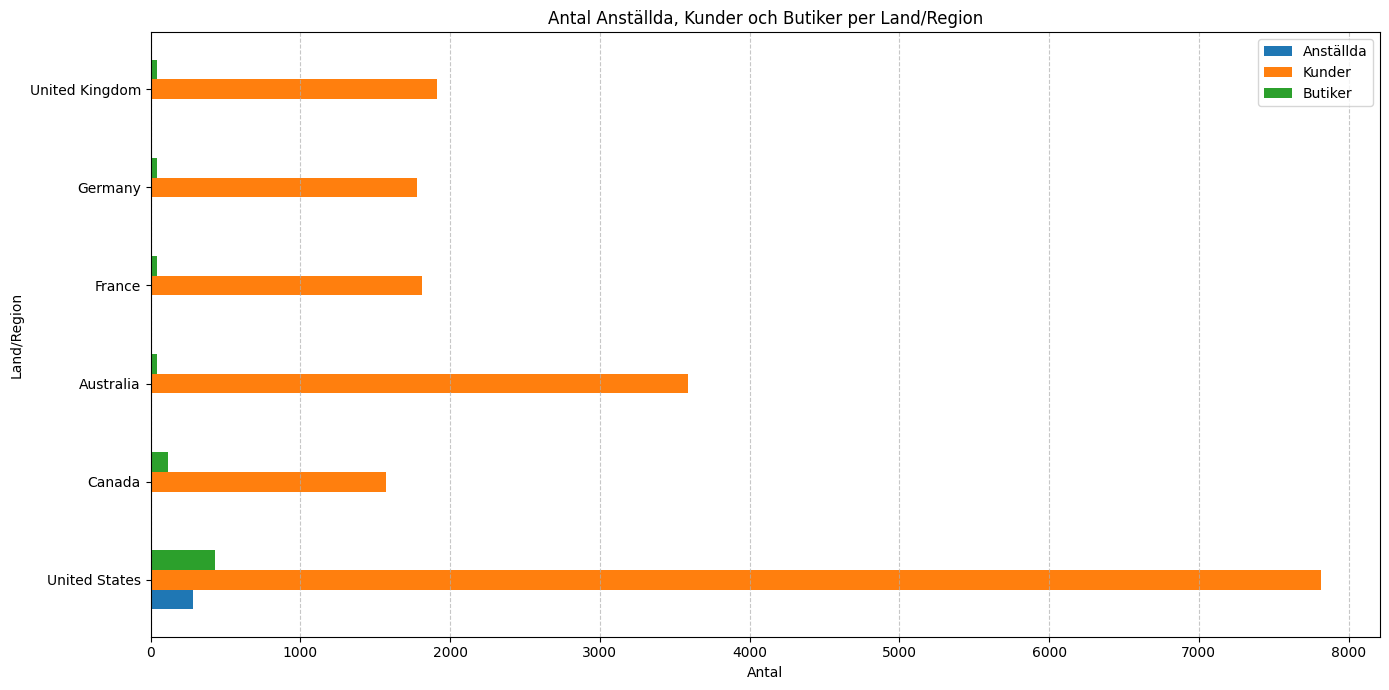

In [12]:
# Antal anställda, kunder och butiker per land

try:
    with engine.connect() as conn:
        query = """
            SELECT TOP 6
                cr.Name AS Land,
                COUNT(DISTINCT e.BusinessEntityID) AS 'Antal Anställda',
                COUNT(DISTINCT c.CustomerID) AS 'Antal kunder',
                COUNT(DISTINCT s.BusinessEntityID) AS 'Antal butiker'
            FROM Person.CountryRegion cr
            LEFT JOIN Person.StateProvince sp ON cr.CountryRegionCode = sp.CountryRegionCode
            LEFT JOIN Person.Address a ON sp.StateProvinceID = a.StateProvinceID
            LEFT JOIN Person.BusinessEntityAddress bea ON a.AddressID = bea.AddressID
            LEFT JOIN HumanResources.Employee e ON bea.BusinessEntityID = e.BusinessEntityID
            LEFT JOIN Sales.Customer c ON c.PersonID = bea.BusinessEntityID
            LEFT JOIN Sales.Store s ON s.BusinessEntityID = bea.BusinessEntityID
            GROUP BY cr.Name
            ORDER BY 'Antal Anställda' DESC;
        """

        stat_df = pd.read_sql(text(query), conn)

        # Eventuella NULL-värden konverterars till heltal
        stat_df[['Antal Anställda', 'Antal kunder', 'Antal butiker']] = stat_df[['Antal Anställda', 'Antal kunder', 'Antal butiker']].fillna(0).astype(int)

        display(stat_df)

        countries = stat_df['Land'].to_numpy()
        employees = stat_df['Antal Anställda'].to_numpy()
        customers = stat_df['Antal kunder'].to_numpy()
        stores = stat_df['Antal butiker'].to_numpy()

        y = np.arange(len(countries)) 
        width = 0.2

        plt.figure(figsize=(14, 7))
        plt.barh(y - width, employees, width, label='Anställda') 
        plt.barh(y, customers, width, label='Kunder') 
        plt.barh(y + width, stores, width, label='Butiker') 

        plt.ylabel('Land/Region') 
        plt.xlabel('Antal') 
        plt.title('Antal Anställda, Kunder och Butiker per Land/Region')
        plt.yticks(y, countries) 
        plt.legend()
        plt.grid(axis='x', linestyle='--', alpha=0.7) 
        plt.tight_layout()
        plt.show()


except sqlalchemy.exc.SQLAlchemyError as e:
    print(f"Ett databasfel inträffade: {e}")
except Exception as e:
    print(f"Ett annat fel inträffade: {e}")
finally:
    engine.dispose()

Ovan fick vi sammanlagt ut 18 484 kunder som har en registrerad adress och diffen ser vi i resultatet här under. Tillsammans blir de 19 820 som det ska vara men det finns då en osäkerhet för vilken adress de resterande 1 336 egentligen bor på och därmed vilket land de tillhör. Leveransadress/fakturaadress skulle kunna vara ett alternativt sätt att få ned antalet med okänd adress men det finns ingen garanti för att kunder bor där och efter försök så lyckades jag ändå inte komma upp i det totala kundantalet på detta vis.

In [19]:
# Hur många kunder utan registrerad adress
query = """
    SELECT COUNT(c.CustomerID)
    FROM Sales.Customer c
    WHERE NOT EXISTS (
        SELECT 1
        FROM Person.BusinessEntityAddress bea
        WHERE c.PersonID = bea.BusinessEntityID
    );
"""

noadress_df = pd.read_sql(query, engine)
noadress_df

,
0,1336


In [45]:
# Produktkategorier, subkategorier och antal produkter

from IPython.display import display, HTML # För att kunna visa tabeller bredvid varandra

query = """
SELECT pc.Name AS ProduktKatergori,
        psc.Name AS ProduktSubKategori,
        COUNT(*) AS AntalProdukter
FROM Production.Product p
JOIN Production.ProductSubcategory psc ON p.ProductSubcategoryID = psc.ProductSubcategoryID
JOIN Production.ProductCategory pc ON psc.ProductCategoryID = pc.ProductCategoryID
GROUP BY pc.Name, psc.Name
ORDER BY pc.Name, AntalProdukter DESC;
"""

prod_df = pd.read_sql(query, engine)

total_products = prod_df['AntalProdukter'].sum()

total_subcategories = prod_df['ProduktSubKategori'].nunique()

# Sammanfattningstabell
summary_data = {'Metric': ['Totalt antal Produkter', 'Totalt antal Subkategorier'],
                'Value': [total_products, total_subcategories]}
summary_df = pd.DataFrame(summary_data)

def highlight_totals(val):
    color = 'lightgray' if val == 'Totalt antal produkter' or val == 'Totalt antal Subkategorier' else ''
    return f'background-color: {color}'

styled_df = prod_df.style 
styled_summary_df = summary_df.style

# Visa tabellerna bredvid varandra med HTML
display(HTML(styled_df.to_html(index=False) + styled_summary_df.to_html(index=False)))


,ProduktKatergori,ProduktSubKategori,AntalProdukter
0,Accessories,Tires and Tubes,11
1,Accessories,Helmets,3
2,Accessories,Bottles and Cages,3
3,Accessories,Lights,3
4,Accessories,Pumps,2
5,Accessories,Hydration Packs,1
6,Accessories,Panniers,1
7,Accessories,Locks,1
8,Accessories,Fenders,1
9,Accessories,Bike Racks,1


Tabellen nedan visar försäljningen fördelat per land både för totalen och för de olika kategorierna av produkter.

In [21]:
# Försäljning per land

try:
    with engine.connect() as conn:
        query = """
            SELECT
                st.CountryRegionCode AS Land,
                pc.Name AS Kategori,
                SUM(sod.LineTotal) AS TotalFörsäljning
            FROM Sales.SalesOrderDetail sod
            JOIN Sales.SalesOrderHeader soh ON sod.SalesOrderID = soh.SalesOrderID
            JOIN Sales.SalesTerritory st ON soh.TerritoryID = st.TerritoryID
            JOIN Production.Product p ON sod.ProductID = p.ProductID
            JOIN Production.ProductSubcategory psc ON p.ProductSubcategoryID = psc.ProductSubcategoryID
            JOIN Production.ProductCategory pc ON psc.ProductCategoryID = pc.ProductCategoryID
            GROUP BY
                st.CountryRegionCode, pc.Name
            ORDER BY
                st.CountryRegionCode, pc.Name;
        """
        sales_df = pd.read_sql(text(query), conn)

        total_försäljning_alla = sales_df['TotalFörsäljning'].sum()
        pivot_df = sales_df.pivot_table(index='Kategori', columns='Land', values='TotalFörsäljning', aggfunc='sum', fill_value=0)
        pivot_percent_df = (pivot_df / total_försäljning_alla) * 100
        pivot_percent_df['Total'] = pivot_percent_df.sum(axis=1)
        total_row = pivot_percent_df.sum(axis=0)
        total_row.name = 'Total' 
        pivot_percent_df = pd.concat([pivot_percent_df, pd.DataFrame(total_row).T])
        pivot_percent_df = pivot_percent_df.map('{:.1f}%'.format).fillna("0.0%") # Formatera till procent med en decimal samt hantera NaN-värden

        print(pivot_percent_df)
        
except sqlalchemy.exc.SQLAlchemyError as e:
    print(f"Ett databasfel inträffade: {e}")
except Exception as e:
    print(f"Ett annat fel inträffade: {e}")
finally:
    engine.dispose()

Land           AU     CA    DE    FR    GB     US   Total
Accessories  0.1%   0.2%  0.1%  0.1%  0.1%   0.5%    1.2%
Bikes        9.3%  12.3%  4.0%  5.6%  6.1%  49.0%   86.2%
Clothing     0.1%   0.4%  0.1%  0.1%  0.1%   1.1%    1.9%
Components   0.2%   2.0%  0.3%  0.8%  0.6%   6.8%   10.7%
Total        9.7%  14.9%  4.5%  6.6%  7.0%  57.4%  100.0%


Kikar vi på hur den totala omsättningen samt vinstmarginalen har utvecklat sig över tid så ser vi att omsättningen har en bra uppåtgående trend men det finns en stor variation mellan februari-april 2014 som också syns extra tydligt i barplot-diagrammet.   
Det finns också en ökning i omsättning under sommaren 2013 som vi senare kommer se troligen beror på att onlineförsäljningen gick upp väldigt mycket.   
Vinstmarginalen var ovanligt låg i april-maj 2012 men återhämtar sig bra därefter, framför allt efter sommaren 2013 då onlineförsäljningen skjuter i höjden.

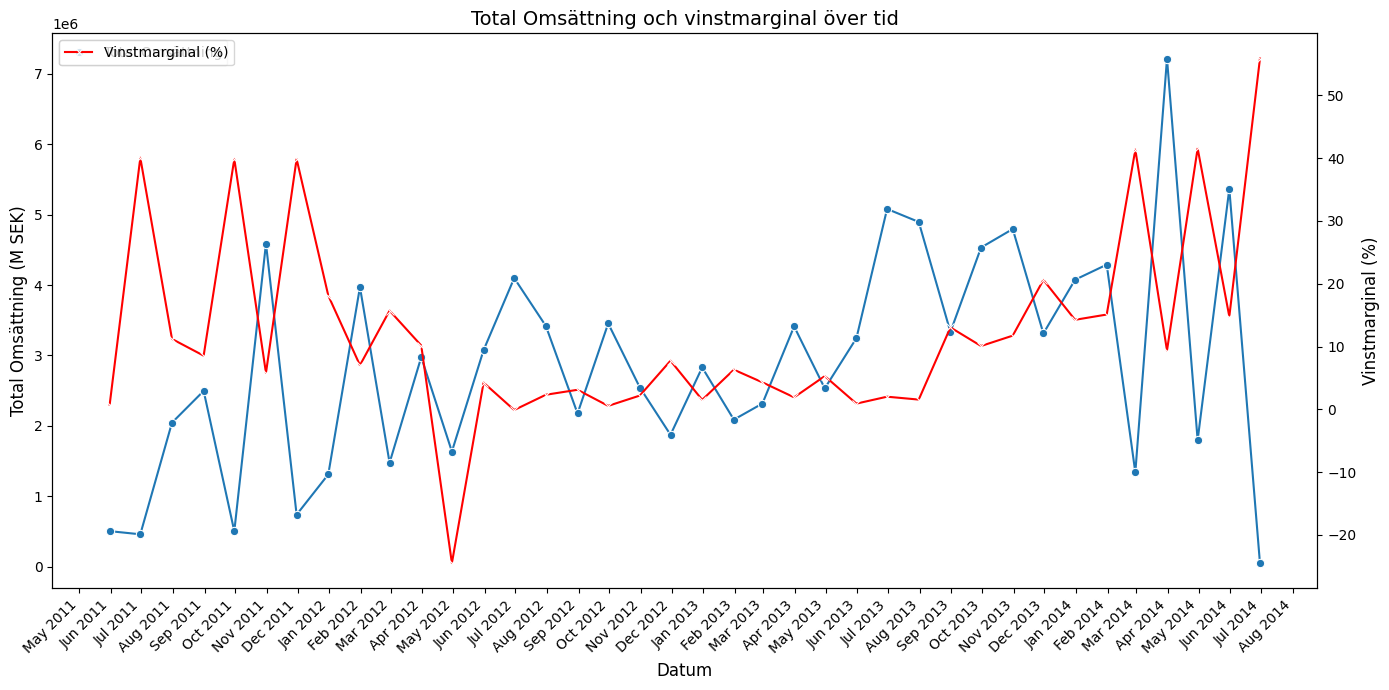

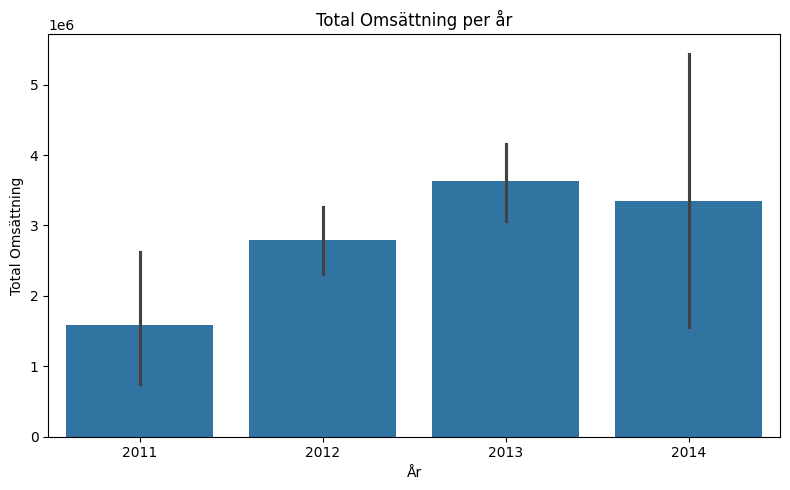

In [15]:
# Omsättning och vinst per månad
query = """
    SELECT
        EOMONTH(soh.OrderDate) AS SalesDate,
        SUM(sod.LineTotal) AS TotalRevenue,
        SUM(p.StandardCost * sod.OrderQty) AS TotalCost,
            CASE
                WHEN SUM(sod.LineTotal) = 0 THEN 0.0
                ELSE (SUM(sod.LineTotal) - SUM(p.StandardCost * sod.OrderQty)) * 100.0 / SUM(sod.LineTotal)
            END AS GrossProfitMargin
        FROM Sales.SalesOrderHeader soh
        JOIN Sales.SalesOrderDetail sod ON soh.SalesOrderID = sod.SalesOrderID
        JOIN Production.Product p ON sod.ProductID = p.ProductID
        GROUP BY
            EOMONTH(soh.OrderDate)
        ORDER BY
            SalesDate;
"""

oms_df = pd.read_sql(query, engine)

oms_df['TotalRevenue'] = oms_df['TotalRevenue'].apply(lambda x: f"{x:,.2f}")
oms_df['TotalCost'] = oms_df['TotalCost'].apply(lambda x: f"{x:,.2f}")
oms_df['GrossProfitMargin'] = oms_df['GrossProfitMargin'].apply(lambda x: f"{x:,.2f}")

oms_df['TotalRevenue'] = oms_df['TotalRevenue'].str.replace(',', '', regex=False).astype(float)
oms_df['TotalCost'] = oms_df['TotalCost'].str.replace(',', '', regex=False).astype(float)
oms_df['GrossProfitMargin'] = oms_df['GrossProfitMargin'].str.replace(',', '', regex=False).astype(float)
oms_df['SalesDate'] = pd.to_datetime(oms_df['SalesDate'])

fig, ax1 = plt.subplots(figsize=(14, 7))

sns.lineplot(x='SalesDate', y='TotalRevenue', data=oms_df, label='Total Omsättning', marker='o', ax=ax1)
ax1.set_xlabel('Datum', fontsize=12)
ax1.set_ylabel('Total Omsättning (M SEK)', fontsize=12)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
sns.lineplot(x='SalesDate', y='GrossProfitMargin', data=oms_df, label='Vinstmarginal (%)', marker='x', color='red', ax=ax2)
ax2.set_ylabel('Vinstmarginal (%)', fontsize=12)
ax2.tick_params(axis='y')

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

plt.title('Total Omsättning och vinstmarginal över tid', fontsize=14)
fig.tight_layout()
plt.show()

oms_df['SalesYear'] = oms_df['SalesDate'].dt.year
plt.figure(figsize=(8, 5))
sns.barplot(x='SalesYear', y='TotalRevenue', data=oms_df)
plt.title('Total Omsättning per år')
plt.xlabel('År')
plt.ylabel('Total Omsättning')
plt.tight_layout()
plt.show()

# print(oms_df) # visar tabell med detaljerade siffror


In [25]:
# 10 bäst och sämst säljande produkterna med kategorier, omsättning och antal:
query = """
SELECT TOP 10 p.Name AS Produktnamn, pc.Name AS Katergori, SUM(sod.LineTotal) AS 'Total omsättning', SUM(sod.OrderQty) AS 'Antal sålda'
FROM Sales.SalesOrderDetail sod
JOIN Sales.SalesOrderHeader soh ON sod.SalesOrderID = soh.SalesOrderID
JOIN Production.Product p ON sod.ProductID = p.ProductID
JOIN Production.ProductSubcategory psc ON p.ProductSubcategoryID = psc.ProductSubcategoryID
JOIN Production.ProductCategory pc ON psc.ProductCategoryID = pc.ProductCategoryID
GROUP BY p.Name, pc.Name
ORDER BY 'Antal sålda' DESC
"""

mostsold = pd.read_sql(query, engine)
display(mostsold.style.format({col: "{:.0f}".format for col in mostsold.select_dtypes(include=np.number)})) 

query = """
SELECT TOP 10 p.Name AS Produktnamn, pc.Name AS Kategori, SUM(sod.LineTotal) AS 'Total omsättning', SUM(sod.OrderQty) AS 'Antal sålda'
FROM Sales.SalesOrderDetail sod
JOIN Sales.SalesOrderHeader soh ON sod.SalesOrderID = soh.SalesOrderID
JOIN Production.Product p ON sod.ProductID = p.ProductID
JOIN Production.ProductSubcategory psc ON p.ProductSubcategoryID = psc.ProductSubcategoryID
JOIN Production.ProductCategory pc ON psc.ProductCategoryID = pc.ProductCategoryID
GROUP BY p.Name, pc.Name
ORDER BY 'Antal sålda' ASC
"""

leastsold = pd.read_sql(query, engine)
display(leastsold.style.format({col: "{:.0f}".format for col in leastsold.select_dtypes(include=np.number)})) 



,Produktnamn,Katergori,Total omsättning,Antal sålda
0,AWC Logo Cap,Clothing,51229,8311
1,Water Bottle - 30 oz.,Accessories,28654,6815
2,"Sport-100 Helmet, Blue",Accessories,165407,6743
3,"Long-Sleeve Logo Jersey, L",Clothing,198755,6592
4,"Sport-100 Helmet, Black",Accessories,160870,6532
5,"Sport-100 Helmet, Red",Accessories,157772,6266
6,"Classic Vest, S",Clothing,156398,4247
7,Patch Kit/8 Patches,Accessories,8233,3865
8,"Short-Sleeve Classic Jersey, XL",Clothing,129146,3864
9,"Long-Sleeve Logo Jersey, M",Clothing,115249,3636


,Produktnamn,Kategori,Total omsättning,Antal sålda
0,"LL Touring Frame - Blue, 58",Components,800,4
1,"ML Mountain Frame-W - Silver, 38",Components,1529,7
2,"LL Mountain Frame - Black, 40",Components,1199,8
3,LL Road Seat/Saddle,Components,163,10
4,"LL Touring Frame - Blue, 62",Components,3001,15
5,"LL Mountain Frame - Black, 52",Components,2248,15
6,"HL Mountain Frame - Black, 44",Components,13766,17
7,"LL Touring Frame - Blue, 44",Components,5001,25
8,"LL Touring Frame - Yellow, 58",Components,7202,36
9,"LL Mountain Frame - Silver, 48",Components,6971,44


In [81]:
# Produkterna med största och minsta vinstmarginalen (topp 10)
query = """
    SELECT TOP 10
        p.Name AS Produktnamn,
        SUM(sod.LineTotal) AS 'Total omsättning',
        SUM(p.StandardCost * sod.OrderQty) AS 'Inköpskostnad',
        SUM(sod.LineTotal) - SUM(p.StandardCost * sod.OrderQty) AS 'Total vinst',
        (SUM(sod.LineTotal) - SUM(p.StandardCost * sod.OrderQty)) * 100.0 / SUM(sod.LineTotal) AS 'Vinstmarginal %'
    FROM Sales.SalesOrderDetail sod
    JOIN Sales.SalesOrderHeader soh ON sod.SalesOrderID = soh.SalesOrderID
    JOIN Production.Product p ON sod.ProductID = p.ProductID
    GROUP BY
        p.Name
    ORDER BY
        'Vinstmarginal %' DESC;
"""
mestmarg = pd.read_sql(query, engine)
display(mestmarg.style.format({col: "{:.0f}".format for col in mestmarg.select_dtypes(include=np.number)}))

query = """
    SELECT TOP 10
        p.Name AS Produktnamn,
        SUM(sod.LineTotal) AS 'Total omsättning',
        SUM(p.StandardCost * sod.OrderQty) AS 'Inköpskostnad',
        SUM(sod.LineTotal) - SUM(p.StandardCost * sod.OrderQty) AS 'Total vinst',
        (SUM(sod.LineTotal) - SUM(p.StandardCost * sod.OrderQty)) * 100.0 / SUM(sod.LineTotal) AS 'Vinstmarginal %'
    FROM Sales.SalesOrderDetail sod
    JOIN Sales.SalesOrderHeader soh ON sod.SalesOrderID = soh.SalesOrderID
    JOIN Production.Product p ON sod.ProductID = p.ProductID
    GROUP BY
        p.Name
    ORDER BY
        'Vinstmarginal %' ASC;
"""
minstmarg = pd.read_sql(query, engine)
display(minstmarg.style.format({col: "{:.0f}".format for col in minstmarg.select_dtypes(include=np.number)})) 



,Produktnamn,Total omsättning,Inköpskostnad,Total vinst,Vinstmarginal %
0,Fender Set - Mountain,46620,17436,29184,63
1,HL Mountain Tire,48860,18274,30586,63
2,All-Purpose Bike Stand,39591,14807,24784,63
3,HL Road Tire,27971,10461,17510,63
4,ML Mountain Tire,34818,13022,21796,63
5,Touring Tire,27106,10138,16968,63
6,LL Mountain Tire,21541,8057,13485,63
7,ML Road Tire,23141,8655,14486,63
8,LL Road Tire,22436,8391,14045,63
9,Mountain Bottle Cage,20230,7566,12664,63


,Produktnamn,Total omsättning,Inköpskostnad,Total vinst,Vinstmarginal %
0,"Long-Sleeve Logo Jersey, L",198755,253741,-54986,-28
1,"Short-Sleeve Classic Jersey, XL",129146,160635,-31490,-24
2,"Long-Sleeve Logo Jersey, M",115249,139958,-24709,-21
3,"Short-Sleeve Classic Jersey, L",98473,118398,-19925,-20
4,"Long-Sleeve Logo Jersey, XL",95611,114707,-19096,-20
5,"Road-650 Red, 44",943341,1097037,-153696,-16
6,"Short-Sleeve Classic Jersey, S",71606,81274,-9668,-14
7,AWC Logo Cap,51229,57531,-6302,-12
8,"Touring-3000 Blue, 50",348582,388075,-39494,-11
9,"Touring-3000 Yellow, 62",351548,389459,-37912,-11


### Statistisk analys
Vi undersöker här det genomsnittliga ordervärdet, räknar ut standardavvikelsen och anger ett konfidensintervall.   
Vi antar att datan är approximativt normalfördelad och använder en t-fördelning med antalet frihetsgrader = antal observationer -1.   
Antal observationer vi använder är de 31 465 ordrar som finns i databasen och vi kommer fram till att med 95% sannolikhet ligger det sanna genomsnittliga ordervärdet mellan 3777.71 och 4054.29. Vill vi har en högre sannolikhet på 99% så hamnar istället intervallet mellan 3734.25 och 4097.74, alltså lite bredare.   
   
Det finns en snedfördelning med en mycket lång svans åt höger eftersom ett mindre antal ordrar har riktigt höga ordervärden, upp emot 187 000 och detta förklarar den höga standardavvikelsen på ~ 12516.   
I det andra histogrammet nedan ser vi att de flesta ordrar annars sällan har ett ordervärde över 5000.   
I box-plot diagrammet kan man se spridningen och att det blir glesare med ordervärden ju högre upp på skalan värdet är.
   
Medianen på ~ 865 och percentilerna i tabellen visar också på vilket sned spridning det är när 90% av ordrarna har ett värde på ~3953 eller lägre och samtidigt ligger det mycket nära medelvärdet.


Genomsnittligt ordervärde: 3916.00
Standardavvikelse för ordervärden: 12515.26
Antal ordrar: 31465
95% Konfidensintervall: (3777.71, 4054.29)
99% Konfidensintervall: (3734.25, 4097.74)

median      865.204
count     31465.000000
mean       3915.995109
std       12515.462713
min           1.518300
25%          62.951900
50%         865.204000
75%        2615.490800
90%        3953.988400
95%       20430.546040
99%       69303.264232
max      187487.825000
Name: Ordervärde, dtype: float64


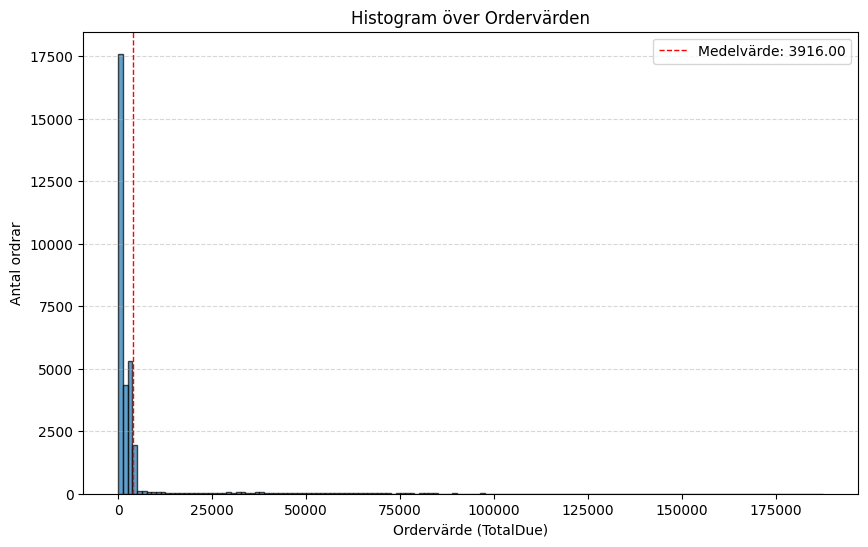

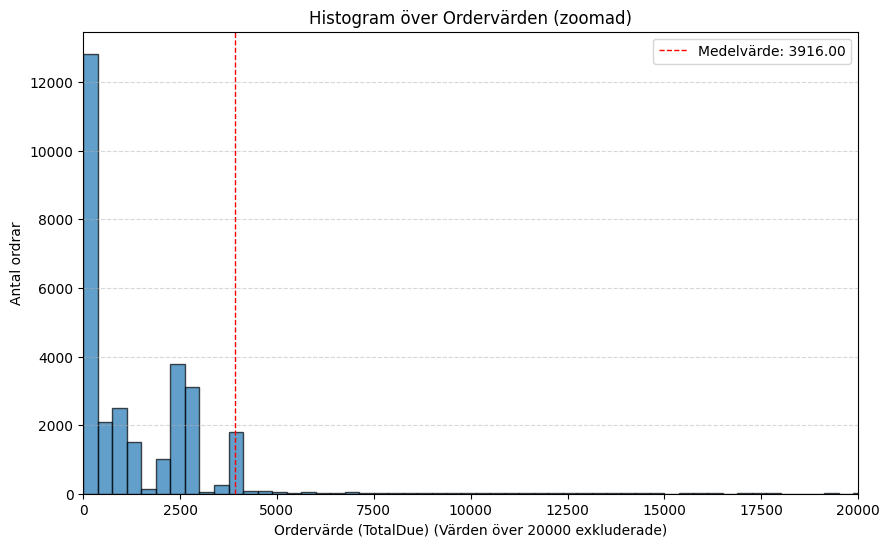

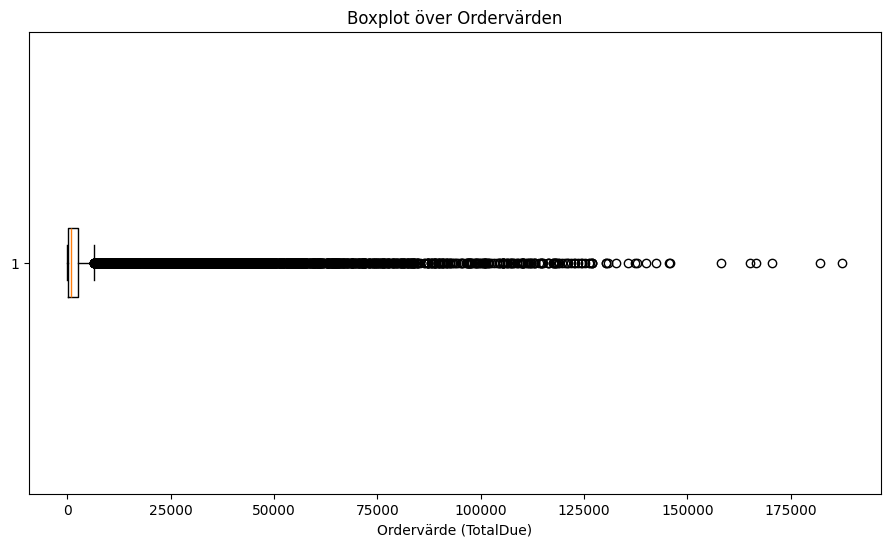

In [93]:
# Genomsnittligt ordervärde, standardavvikelse och konfidensintervall

def calculate_confidence_interval(mean, std_dev, n, confidence=0.95):
    """Beräknar konfidensintervallet med t-fördelningen."""
    if n <= 0:
        return None
    std_err = std_dev / np.sqrt(n)
    interval = st.t.interval(confidence, n - 1, loc=mean, scale=std_err)
    return interval

try:
    with engine.connect() as conn:
        query = "SELECT TotalDue FROM Sales.SalesOrderHeader;"
        order_values = pd.read_sql(query, conn)['TotalDue'].values

        average_order_value = np.mean(order_values)
        std_dev = np.std(order_values)
        num_orders = len(order_values)

        confidence_interval_95 = calculate_confidence_interval(average_order_value, std_dev, num_orders)
        confidence_interval_99 = calculate_confidence_interval(average_order_value, std_dev, num_orders, confidence=0.99)

        if confidence_interval_95 and confidence_interval_99:
            print(f"Genomsnittligt ordervärde: {average_order_value:.2f}")
            print(f"Standardavvikelse för ordervärden: {std_dev:.2f}")
            print(f"Antal ordrar: {num_orders}")

            # Formatera konfidensintervallen med två decimaler
            lower_95, upper_95 = confidence_interval_95
            lower_99, upper_99 = confidence_interval_99

            print(f"95% Konfidensintervall: ({lower_95:.2f}, {upper_95:.2f})")
            print(f"99% Konfidensintervall: ({lower_99:.2f}, {upper_99:.2f})")

        else:
            print("Kunde inte beräkna konfidensintervall. Kontrollera datan.")
        print()
        beskr_df = pd.DataFrame(order_values, columns=['Ordervärde'])
        beskrivande_statistik = beskr_df['Ordervärde'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99]) # Lägger till fler percentiler
        median_ordervarde = beskr_df['Ordervärde'].median()
        print(f"median      {median_ordervarde}")
        print(beskrivande_statistik)
                
        # Skapa histogram
        plt.figure(figsize=(10, 6))  # Justera storleken efter behov
        plt.hist(order_values, bins=150, edgecolor='black', alpha=0.7)  # bins anger antalet staplar
        plt.xlabel('Ordervärde (TotalDue)')
        plt.ylabel('Antal ordrar')
        plt.title('Histogram över Ordervärden')
        plt.grid(axis='y', alpha=0.5, linestyle='--')
        
        # Lägg till en vertikal linje för medelvärdet
        mean_value = np.mean(order_values)
        plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Medelvärde: {mean_value:.2f}')
        plt.legend()
        # plt.xlim(0, 100000) # Visar bara ordervärden mellan 0 och 10000
        plt.show()
        
        #Begränsa x-axeln
        plt.figure(figsize=(10, 6))
        plt.hist(order_values, bins=500, edgecolor='black', alpha=0.7)
        plt.xlim(0, 20000) # Begränsar x-axeln till 0-20000
        plt.xlabel('Ordervärde (TotalDue) (Värden över 20000 exkluderade)')
        plt.ylabel('Antal ordrar')
        plt.title('Histogram över Ordervärden (zoomad)')
        plt.grid(axis='y', alpha=0.5, linestyle='--')
        
        # Lägg till en vertikal linje för medelvärdet (valfritt)
        mean_value = np.mean(order_values)
        plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Medelvärde: {mean_value:.2f}')
        plt.legend()
        #  plt.xlim(0, 10000) # Visar bara ordervärden mellan 0 och 10000
        plt.show()
        
        # Visa spridningen på ordervärde
        plt.figure(figsize=(11, 6))
        plt.boxplot(order_values, vert=False) # vert=False för horisontellt boxplot
        plt.xlabel('Ordervärde (TotalDue)')
        plt.title('Boxplot över Ordervärden')
        plt.show()
        
except sqlalchemy.exc.SQLAlchemyError as e:
    print(f"Ett databasfel inträffade: {e}")
except Exception as e:
    print(f"Ett fel inträffade: {e}")
finally:
    engine.dispose()
        

        

### Analys av data med slutsatser och rekommendationer
Som vi såg förut så har AWC en ovanligt stor variation av omsättningen mellan februari och april 2014.   
När vi tittar närmare på detta så ser det ut som man sålt färre än vaniligt av produkterna i februari och april medan mars fått ett större antal produkter sålda än vanligt.   
Det verkar inte vara så att det är en viss typ av artikel eller kategori som utgör förändringen utan ser ut att vara genomgående över sortimentet.   
Nedan visas skillnaden i ett antal produkters försäljning under februari, mars och april.

,Försäljningsår,Försäljningsmånad,Produktkategori,Antal sålda
0,2014,2,Gloves,92
1,2014,2,Helmets,517
2,2014,2,Jerseys,258
3,2014,2,Mountain Bikes,292
4,2014,2,Road Bikes,318
5,2014,2,Road Frames,7
6,2014,2,Touring Bikes,189
7,2014,3,Gloves,643
8,2014,3,Helmets,1695
9,2014,3,Jerseys,2241


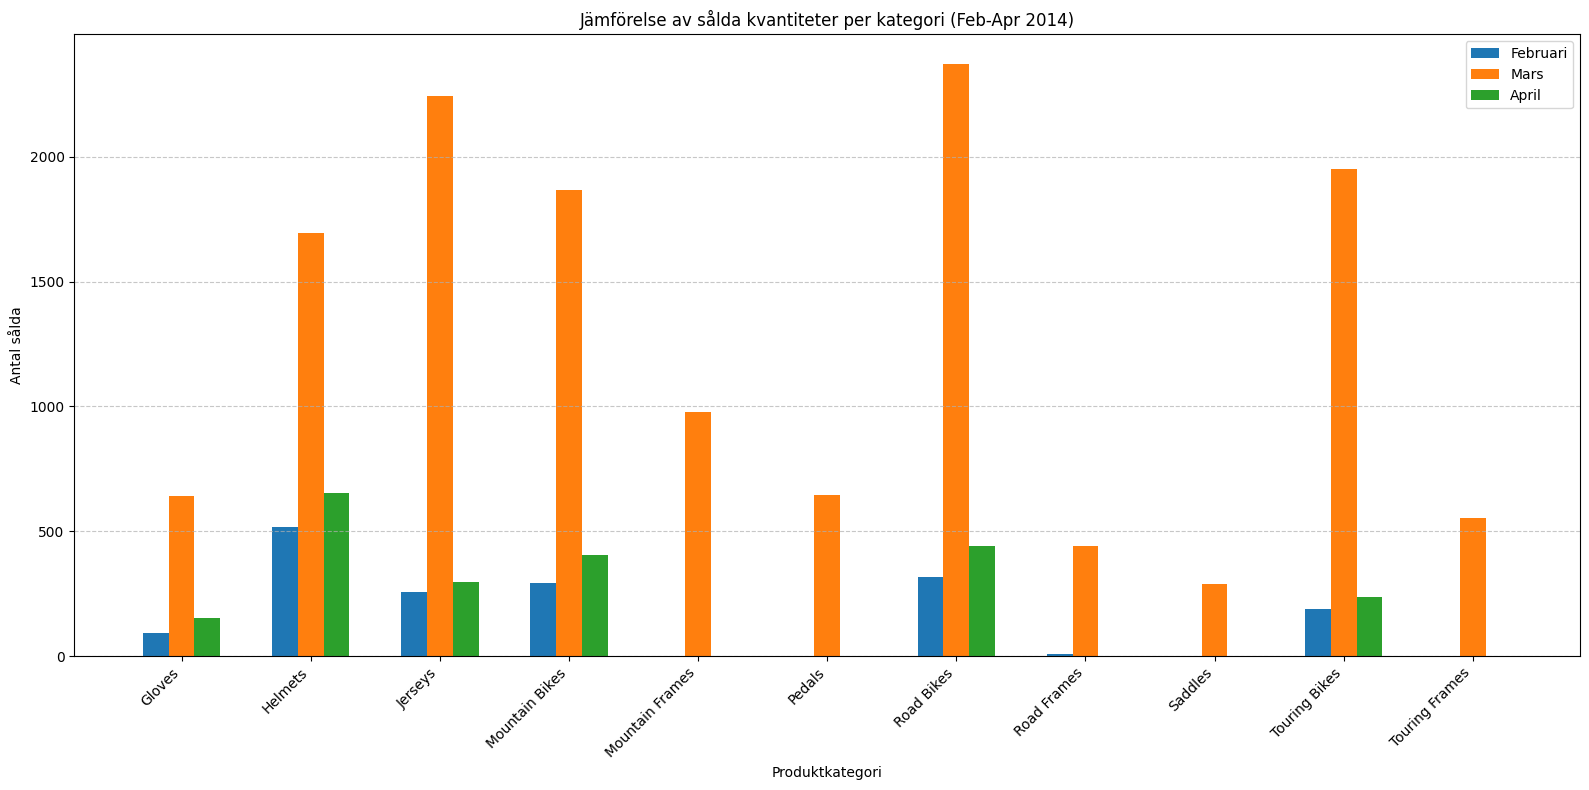

In [ ]:
# Variation i omsättningen februari, mars och april 2014.

try:
    with engine.connect() as conn:
        query = """
            SELECT
                YEAR(soh.OrderDate) AS Försäljningsår,
                MONTH(soh.OrderDate) AS Försäljningsmånad,
                psc.Name AS Produktkategori,
                SUM(sod.OrderQty) AS 'Antal sålda'
            FROM
                Sales.SalesOrderHeader soh
            JOIN Sales.SalesOrderDetail sod ON soh.SalesOrderID = sod.SalesOrderID
            JOIN Production.Product p ON sod.ProductID = p.ProductID
            JOIN Production.ProductSubcategory psc ON p.ProductSubcategoryID = psc.ProductSubcategoryID
            WHERE YEAR(soh.OrderDate) = 2014 AND MONTH(soh.OrderDate) IN (2, 3, 4)
              AND psc.Name IN ('Touring Bikes', 'Road Bikes', 'Mountain Bikes', 'Mountain Frames', 'Touring Frames', 'Road Frames', 'Jerseys', 'Helmets', 'Pedals', 'Saddles', 'Gloves')
            GROUP BY
                YEAR(soh.OrderDate), MONTH(soh.OrderDate), psc.Name
            ORDER BY Försäljningsmånad, Produktkategori;
        """

        omsvar_df = pd.read_sql(text(query), conn)
        display(omsvar_df)

        pivot_df = omsvar_df.pivot_table(index='Produktkategori', columns='Försäljningsmånad', values='Antal sålda', fill_value=0)
        months = {2: 'Februari', 3: 'Mars', 4: 'April'}
        pivot_df = pivot_df.rename(columns=months)
        categories = pivot_df.index
        bar_width = 0.2
        x = np.arange(len(categories))
        fig, ax = plt.subplots(figsize=(16, 8))

        for i, month in enumerate(pivot_df.columns):
            quantities = pivot_df[month].to_numpy()
            ax.bar(x + (i-1)*bar_width, quantities, bar_width, label=month)

        ax.set_xticks(x)
        ax.set_xticklabels(categories, rotation=45, ha='right')
        ax.set_ylabel('Antal sålda')
        ax.set_xlabel('Produktkategori')
        ax.set_title('Jämförelse av sålda kvantiteter per kategori (Feb-Apr 2014)')
        ax.legend()
        plt.tight_layout()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

except sqlalchemy.exc.SQLAlchemyError as e:
    print(f"Ett databasfel inträffade: {e}")
except Exception as e:
    print(f"Ett annat fel inträffade: {e}")
finally:
    engine.dispose()

Det verkar inte som om det heller funnits kampanjer eller rabatter i tillräckligt stor utsträckning under mars för att ha kunnat boosta försäljningen och utgöra en sådan skillnad. Det såldes 91 artiklar under mars månad med liten genomsnittlig rabatt så en ökning beror troligen inte på en kampanj.

In [38]:
# Fanns det kampanjer eller rabatter under mars?
query = """
    SELECT
        YEAR(soh.OrderDate) AS Försäljningsår,
        MONTH(soh.OrderDate) AS Försäljningsmånad,
        AVG(sod.UnitPriceDiscount) *100 AS 'Rabatt genomsnitt'
    FROM
        Sales.SalesOrderHeader soh
    JOIN Sales.SalesOrderDetail sod ON soh.SalesOrderID = sod.SalesOrderID
    WHERE YEAR(soh.OrderDate) = 2014 AND MONTH(soh.OrderDate) IN (2, 3, 4)
    GROUP BY
        YEAR(soh.OrderDate), MONTH(soh.OrderDate)
    ORDER BY
        Försäljningsår, Försäljningsmånad;
"""

kamp_df = pd.read_sql(query, engine)
kamp_df

,Försäljningsår,Försäljningsmånad,Rabatt genomsnitt
0,2014,2,0.00
1,2014,3,0.43
2,2014,4,0.00


In [41]:
# Hur många ordrar med rabatter?
query = """
    SELECT
        YEAR(soh.OrderDate) AS Försäljningsår,
        MONTH(soh.OrderDate) AS Försäljningsmånad,
        COUNT(DISTINCT soh.SalesOrderID) AS 'Rabatterade ordrar'
    FROM
        Sales.SalesOrderHeader soh
    JOIN Sales.SalesOrderDetail sod ON soh.SalesOrderID = sod.SalesOrderID
    WHERE YEAR(soh.OrderDate) = 2014 AND MONTH(soh.OrderDate) IN (2, 3, 4) AND sod.UnitPriceDiscount > 0
    GROUP BY
        YEAR(soh.OrderDate), MONTH(soh.OrderDate)
    ORDER BY
        Försäljningsår, Försäljningsmånad;
"""

discount_df = pd.read_sql(query, engine)
discount_df

,Försäljningsår,Försäljningsmånad,Rabatterade ordrar
0,2014,3,91


Vi antar att onlineförsäljningen vid tillfället stod för en mycket stor del av försäljningen och då borde det synas en liknande variation som i omsättningen.   
En viss ökning syns i antal ordrar mellan februari och mars men antalet ordrar går inte ned i tillräcklig utsträckning i april sedan.   
Det som däremot syns i diagrammet nedan är en rejäl ökning av onlineförsäljningen i maj-juni 2013 men vi går inte in på detta närmare här mer än att vi såg förut att det också resulterade i en ökad omsättning efter sommaren 2013. Det kan vara så att detta var startskottet för en ny startegi, kampanj eller handelsplattform vad gäller onlineförsäljning runt tidpunkten.

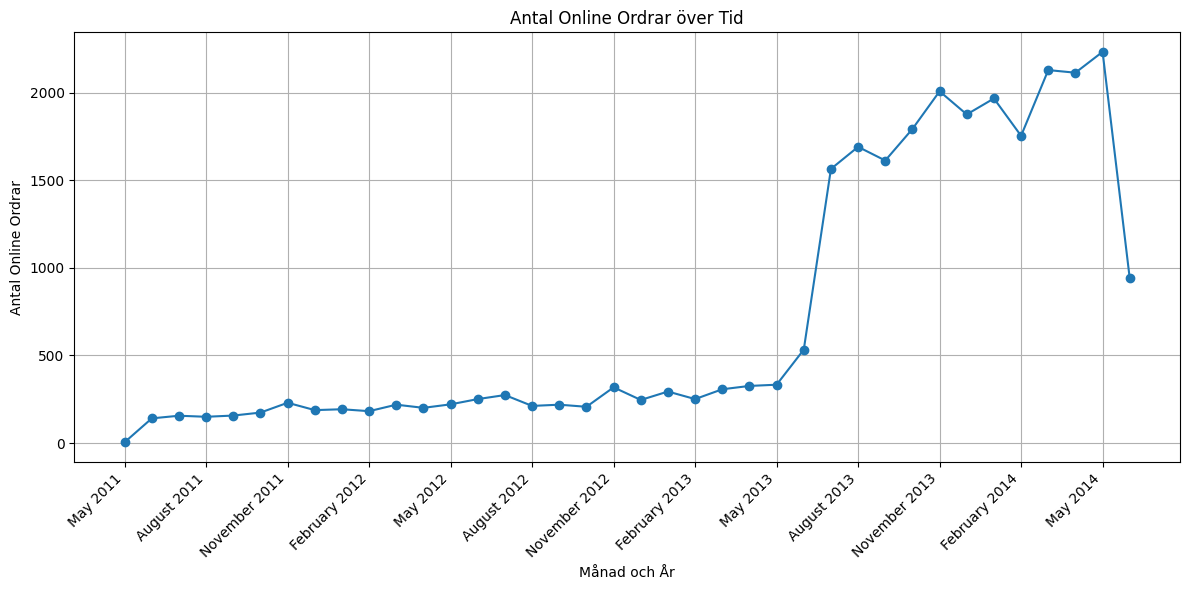

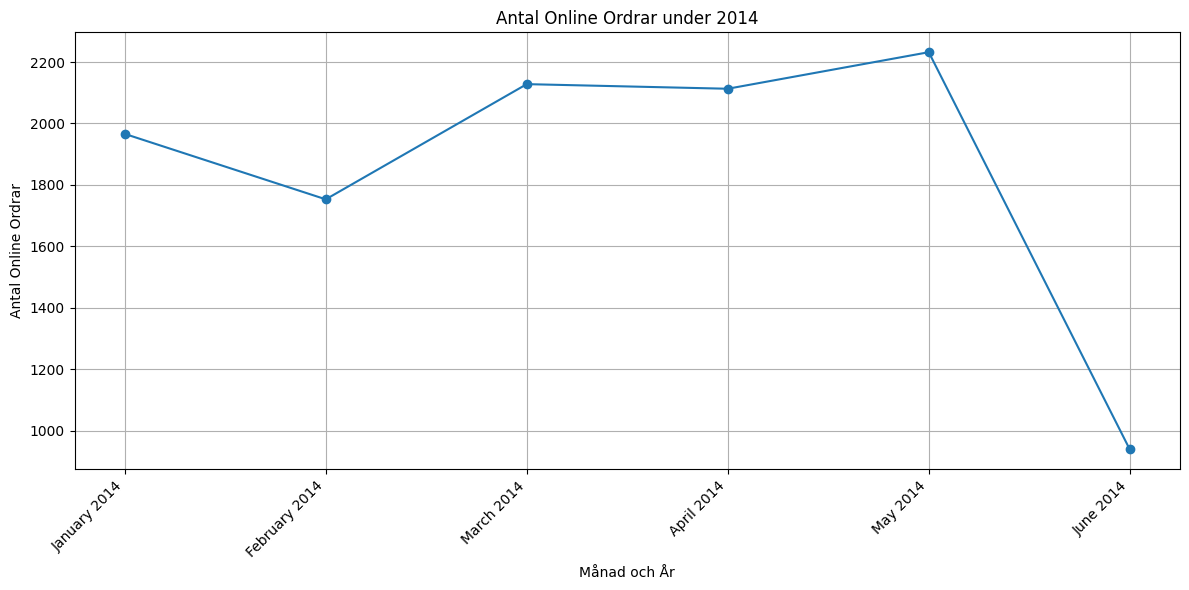

In [52]:
# Onlineordrar

try:
    with engine.connect() as conn:
        query = """
            SELECT
                YEAR(OrderDate) AS År,
                MONTH(OrderDate) AS Månad,
                COUNT(*) AS AntalOnlineOrdrar
            FROM Sales.SalesOrderHeader
            WHERE OnlineOrderFlag = 1
            GROUP BY YEAR(OrderDate), MONTH(OrderDate)
            ORDER BY YEAR(OrderDate), MONTH(OrderDate);
        """
        online_df = pd.read_sql(text(query), conn)

        online_df['Månad_År'] = online_df.apply(lambda row: f"{calendar.month_name[row['Månad']]} {row['År']}", axis=1)

        plt.figure(figsize=(12, 6))
        plt.plot(online_df['Månad_År'], online_df['AntalOnlineOrdrar'], marker='o', linestyle='-') 
        plt.xlabel('Månad och År')
        plt.ylabel('Antal Online Ordrar')
        plt.title('Antal Online Ordrar över Tid')
        plt.xticks(online_df['Månad_År'][::3], rotation=45, ha='right') 
        plt.grid(True) 
        plt.tight_layout()
        
        online_2014_df = online_df[online_df['År'] == 2014]
        
        plt.figure(figsize=(12, 6)) 
        plt.plot(online_2014_df['Månad_År'], online_2014_df['AntalOnlineOrdrar'], marker='o', linestyle='-')
        plt.xlabel('Månad och År')
        plt.ylabel('Antal Online Ordrar')
        plt.title('Antal Online Ordrar under 2014') 
        plt.xticks(online_2014_df['Månad_År'], rotation=45, ha='right') 
        plt.grid(True)
        plt.tight_layout()
        
        plt.show()

except sqlalchemy.exc.SQLAlchemyError as e:
    print(f"Ett databasfel inträffade: {e}")
except Exception as e:
    print(f"Ett annat fel inträffade: {e}")
finally:
    engine.dispose()

Vi ser också nedan att det inte är ett särskilt försäljningsområde som står för ökningen.   
Områdena Southwest och Northwest i USA samt Australien och Canada säljer generellt mer än de andra ormådena men i mars har samtliga områden ökat.   
Misstanke finns att variationen beror på något bokföringstekniskt. Orderdatum borde förvisso vara rätt, framförallt vid onlineförsäljningar, men det kan inte uteslutas att manuell registrering gjorts på mars som skulle funnits i februari och/eller i april.   
   
Rekommendationen är därför att dels titta vidare på bokföringen men också via intervjuer försöka ta reda på om någonting annat vid tidpunkten kan ha påverkat variationen.   
   
Cykling är ju säsongsbetonat men 2013 såg vi inte samma variation i omsättning på våren och även om väder kan påverka så är min bedömning att det är för stor skillnad som syns i omsättningen. Även idrottshändelser kan påverka försäljningen men samtliga stora cykellopp 2014 (Tour de France, Giro d'Italia, m.fl.) kördes senare under året mellan maj-september.

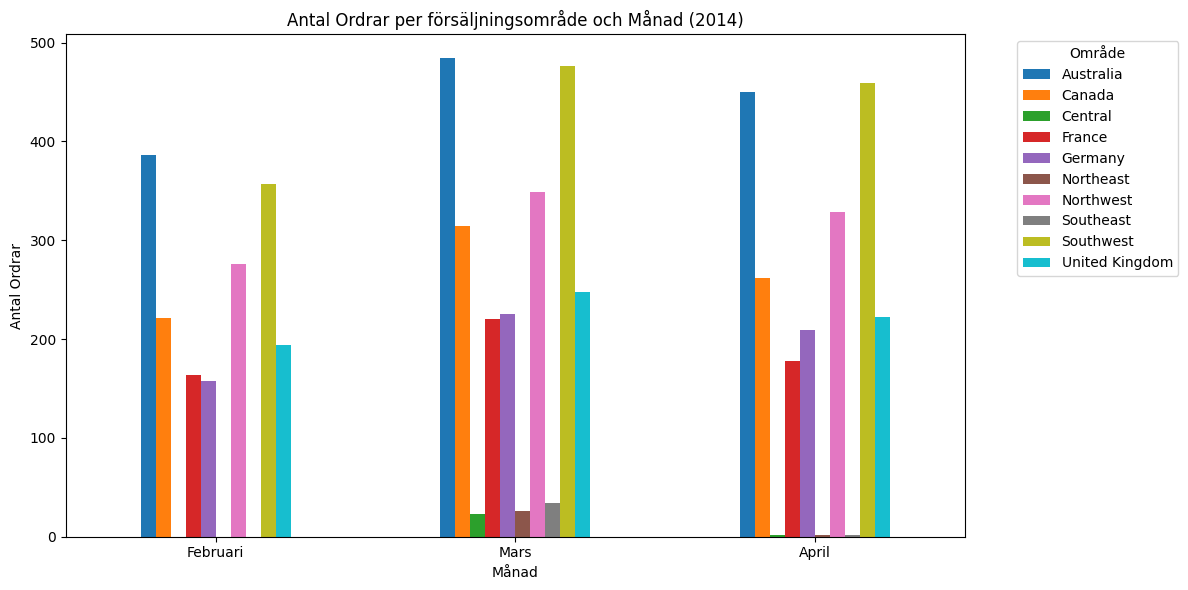

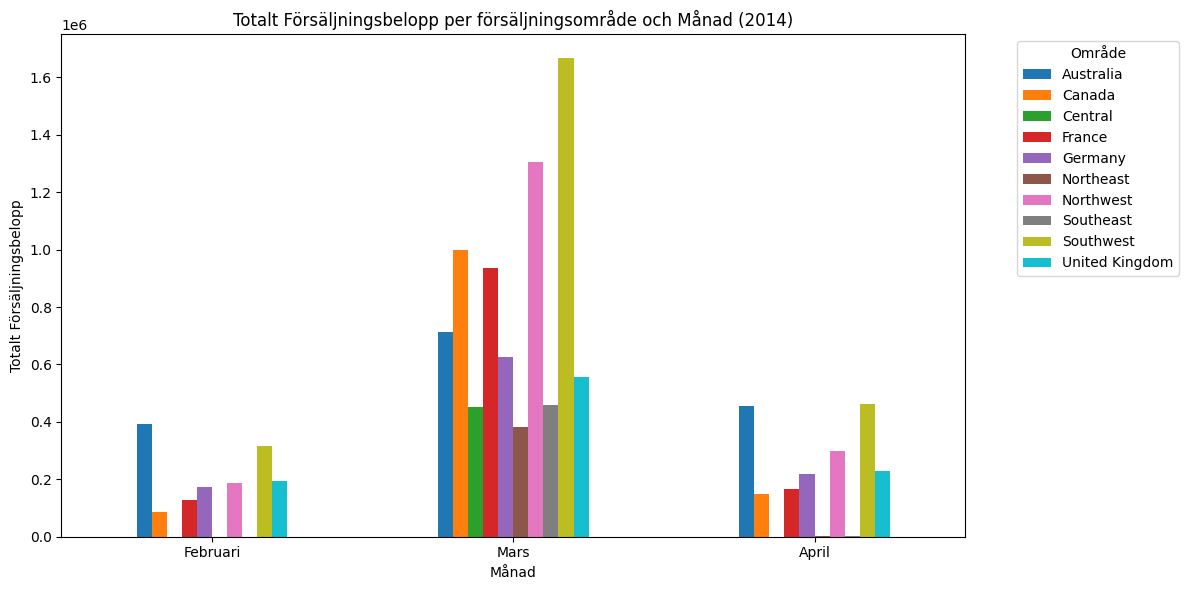

In [56]:
# Jämförelse ordrar och försäljning per geografiskt försäljningsområde
import calendar
try:
    with engine.connect() as conn:
        query = """
            SELECT
                YEAR(soh.OrderDate) AS SalesYear,
                MONTH(soh.OrderDate) AS SalesMonth,
                st.Name AS SalesTerritory,
                COUNT(soh.SalesOrderID) AS NumberOfOrders,
                SUM(soh.TotalDue) AS TotalSalesAmount
            FROM Sales.SalesOrderHeader soh
            JOIN Sales.SalesTerritory st ON soh.TerritoryID = st.TerritoryID
            WHERE YEAR(soh.OrderDate) = 2014 AND MONTH(soh.OrderDate) IN (2, 3, 4)
            GROUP BY
                YEAR(soh.OrderDate), MONTH(soh.OrderDate), st.Name  -- Upprepa uttrycken här
            ORDER BY SalesMonth, SalesTerritory;
        """

        terr_df = pd.read_sql(text(query), conn)

        month_order = ['Februari', 'Mars', 'April']
        months = {2: 'Februari', 3: 'Mars', 4: 'April'}
        terr_df['SalesMonthName'] = terr_df['SalesMonth'].map(months)
        terr_df['SalesMonthName'] = pd.Categorical(terr_df['SalesMonthName'], categories=month_order, ordered=True) 

        # Antal ordrar
        pivot_df = terr_df.pivot(index='SalesMonthName', columns='SalesTerritory', values='NumberOfOrders').fillna(0)
        ax = pivot_df.plot(kind='bar', figsize=(12, 6))
        ax.set_xlabel('Månad')
        ax.set_ylabel('Antal Ordrar')
        ax.set_title('Antal Ordrar per försäljningsområde och Månad (2014)')
        plt.xticks(rotation=0)
        plt.legend(title='Område', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

        # Försäljningsbelopp
        pivot_df_amount = terr_df.pivot(index='SalesMonthName', columns='SalesTerritory', values='TotalSalesAmount').fillna(0) 
        ax_amount = pivot_df_amount.plot(kind='bar', figsize=(12, 6))
        ax_amount.set_xlabel('Månad')
        ax_amount.set_ylabel('Totalt Försäljningsbelopp')
        ax_amount.set_title('Totalt Försäljningsbelopp per försäljningsområde och Månad (2014)')
        plt.xticks(rotation=0)
        plt.legend(title='Område', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
        
except sqlalchemy.exc.SQLAlchemyError as e:
    print(f"Ett databasfel inträffade: {e}")
except Exception as e:
    print(f"Ett annat fel inträffade: {e}")
finally:
    engine.dispose()

   
Vi tittar här också lite närmare på produkter som är olönsamma.   
Vi ser snabbt att flera produkter är reklam- eller goodwillprodukter där AWC säkerligen medvetet lagt ett mycket attraktivt pris för att sälja i stora volymer och därmed få ökad exponering via klädesplaggen som cyklisterna har på sig.   
Förlusterna är inte värdemässigt så stora för dessa produkter i reklamsammanhang och mest troligt en bättre investering än att köpa reklamplats på annat sätt.
Vi förutsätter att det är bra produkter trots att de är billiga och att de annars inte skulle sälja i så stora volymer som vi såg förut i tabellerna.
Det finns däremot inga reviews som kan styrka detta.   
   
Rekommendationen är att det bör undersökas om möjligen finns att höja priset litegrann, kanske i samband med en omdesign, men det är en hårfin gräns som också kan få kunderna att sluta köpa produkterna.

In [74]:
# Produkter med sämst vinstmarginal
query = """
    SELECT TOP 10
        p.Name AS Produktnamn,
        SUM(sod.OrderQty * sod.UnitPrice) AS 'Total omsättning',
        SUM(sod.OrderQty * p.StandardCost) AS Inköpskostnad,
        (SUM(sod.OrderQty * sod.UnitPrice) - SUM(sod.OrderQty * p.StandardCost)) AS 'Total vinst',
        ((SUM(sod.OrderQty * sod.UnitPrice) - SUM(sod.OrderQty * p.StandardCost)) / SUM(sod.OrderQty * sod.UnitPrice)) * 100 AS Vinstmarginal
    FROM
        Sales.SalesOrderDetail sod
    JOIN
        Production.Product p ON sod.ProductID = p.ProductID
    GROUP BY
        p.Name
    HAVING
        ((SUM(sod.OrderQty * sod.UnitPrice) - SUM(sod.OrderQty * p.StandardCost)) / SUM(sod.OrderQty * sod.UnitPrice)) < 0  
    ORDER BY
        Vinstmarginal;
"""

worstmargin_df = pd.read_sql(query, engine)
display(worstmargin_df.style.format({col: "{:.0f}".format for col in worstmargin_df.select_dtypes(include=np.number)}))

,Produktnamn,Total omsättning,Inköpskostnad,Total vinst,Vinstmarginal
0,"Long-Sleeve Logo Jersey, L",200241,253741,-53501,-27
1,"Short-Sleeve Classic Jersey, XL",130878,160635,-29757,-23
2,"Long-Sleeve Logo Jersey, M",115509,139958,-24449,-21
3,"Long-Sleeve Logo Jersey, XL",95689,114707,-19018,-20
4,"Short-Sleeve Classic Jersey, L",99143,118398,-19255,-19
5,"Road-650 Red, 44",967980,1097037,-129056,-13
6,"Short-Sleeve Classic Jersey, S",71785,81274,-9489,-13
7,AWC Logo Cap,51512,57531,-6019,-12
8,"LL Road Frame - Black, 58",177636,192348,-14712,-8
9,"LL Road Frame - Black, 52",299764,323512,-23749,-8


In [79]:
# Reviews och rating
query = """
    SELECT
        pr.ProductID,
        p.Name AS Produktnamn,
        AVG(pr.Rating) AS Medelbetyg,
        COUNT(*) AS 'Antal betyg'
    FROM
        Production.ProductReview pr
    JOIN
        Production.Product p ON pr.ProductID = p.ProductID
    GROUP BY
        pr.ProductID, p.Name
    ORDER BY
        Medelbetyg DESC; 
"""

reviews_df = pd.read_sql(query, engine)
reviews_df

,ProductID,Produktnamn,Medelbetyg,Antal betyg
0,709,"Mountain Bike Socks, M",5,1
1,798,"Road-550-W Yellow, 40",5,1
2,937,HL Mountain Pedal,3,2


Det som AWC förlorar störst summor på är ett antal cykelmodeller.   
Det vi kan se är att modellen Road-650 förekommer 6 gånger på listan med de 10 produkterna med sämst förtjänst och att det till viss del även är cyklar med antingen lite större ramstorlek för människor över 190 cm eller mindre sådana som passar människor under 160 cm. Det kan vara så att dessa till slut tvingas säljas med förlust för att de inte blivit sålda när nya modeller behöver fasas in.   
   
Rekommendationen är därför att undersöka vidare med försäljningsavdelningen om detta kan stämma och om möjligt skala bort ett antal storlekar för att enbart erbjuda dessa som beställningsvara utan lagerhållning.

In [72]:
# Produkter med sämst förtjänst 
query = """
    SELECT TOP 10
        p.Name AS Produktnamn,
        SUM(sod.LineTotal) AS 'Total omsättning',
        SUM(p.StandardCost * sod.OrderQty) AS Inköpskostnad,
        SUM(sod.LineTotal) - SUM(p.StandardCost * sod.OrderQty) AS 'Total vinst',
        (SUM(sod.LineTotal) - SUM(p.StandardCost * sod.OrderQty)) * 100.0 / SUM(sod.LineTotal) AS Vinstmarginal
    FROM
        Sales.SalesOrderDetail sod
    JOIN
        Sales.SalesOrderHeader soh ON sod.SalesOrderID = soh.SalesOrderID
    JOIN
        Production.Product p ON sod.ProductID = p.ProductID
    GROUP BY
        p.Name
    ORDER BY
        'Total vinst' ASC;
"""

minstprofit_df = pd.read_sql(query, engine)
display(minstprofit_df.style.format({col: "{:.0f}".format for col in minstprofit_df.select_dtypes(include=np.number)}))

,Produktnamn,Total omsättning,Inköpskostnad,Total vinst,Vinstmarginal
0,"Road-650 Red, 44",943341,1097037,-153696,-16
1,"Touring-1000 Yellow, 60",1518133,1650879,-132746,-9
2,"Road-650 Red, 60",1016529,1086329,-69800,-7
3,"Touring-1000 Yellow, 46",1426373,1489348,-62975,-4
4,"Road-650 Black, 52",1042910,1104824,-61914,-6
5,"Long-Sleeve Logo Jersey, L",198755,253741,-54986,-28
6,"Road-650 Red, 62",879828,922796,-42968,-5
7,"Road-650 Black, 58",869633,910628,-40995,-5
8,"Road-650 Red, 48",878667,918902,-40235,-5
9,"Touring-3000 Blue, 50",348582,388075,-39494,-11


## Executive Summary
Adventure Works Cycles (AWC) har en uppåtgående trend i omsättning och vinst, men en betydande variation i omsättningen observeras mellan februari och april 2014, vilket kräver ytterligare undersökning av bokföring och eventuella externa faktorer. Onlineförsäljningen ökade extra mycket under 2013 och bidrog till ökad omsättning.   
AWC:s bästsäljande produkter är AWC Logo-kepsen och vattenflaskor, medan ramar till specifika cykelmodeller säljer sämst.   
Produkter med högst vinstmarginal är relaterade till däck och tillbehör, medan logotyptröjor och vissa cykelmodeller har lägst marginal.   
   
Analys av ordervärden visar en snedfördelning med fåtaliga höga ordervärden som påverkar medelvärdet, medan medianen ger en mer representativ bild av typiska ordervärden.   
   
Rekommendationer finns att undersöka variationen i 2014 års försäljning, eventuellt justera prissättningen på reklamprodukter och optimera lagerhållningen av mindre populära cykelstorlekar. En närmare analys av kunddata per land rekommenderas också för att minska antalet kunder med okänd adress.

## Självvärdering   
   
### 1. Utmaningar du haft under arbetet samt hur du hanterat dem.   
Strategi - När jag började kika i tabeller och databasens innehåll fastnade jag ganska snabbt långt ned i strukturerna vilket gjorde att jag förlorade tid. Mycket av det jag kikade på och testade gav ingenting eller blev för avancerat att sy ihop för mig. Det var först efter att jag tagit ett steg bakåt och riktit in mig på ett par spår som jag kände att jag blev mer produktiv.   
   
Kunskaper - Helt klart så har mina envisa försök till att sy ihop tabeller och få ut den data som jag anser mig behöva inneburit att jag fått lära mig pythonkod som jag kanske inte hade gjort på länge annars. Kämpigt men oerhört lärorikt. Alla fel och felaktig data har ju behövt reflekteras över, förstå innebörden av samt lösas eller förkastas. Anamma nya sätt att strukturera koden på, göra tillägg för felsökningar och standarder som varit nytt för mig.   
 
Trots dessa utmaningar så känner jag att hanteringen av felmeddelanden och alla återvändsgränder jag varit inne i har varit det som utvecklat mig mest i arbetet med databasen.   
   
Utanför det "tekniska" så har det också varit en utmaning med att ha hela familjen hemma (skollov, semester) under tiden man ska koncentrera sig och skärma av för att arbeta. Inte alltid lätt men nyttig erfarenhet det också.

### 2. Vilket betyg du anser att du skall ha och varför.   
Jag tänker att G är uppnått och kanske nosar jag även på ett VG men är ödmjuk med att här finns fruktansvärt mycket kvar att lära vad gäller både programmering och visualisering/presentation.

### 3. Tips du hade gett till dig själv i början av kursen nu när du slutfört den.
Att kanske inte lägga så mycket tid på djupet i inledningen utan mer scanna av, ta ett steg bakåt och få en överblick över hela databasen eller projektet för att hitta intressanta delar och problem att analysera och först därefter gå på djupet inom enbart de områden jag bestämt. Det är lätt att fastna längre ned i strukturerna eller med för många smådelar redan i början och tappa tid. Bättre att lägga den på det visuella i slutet istället för på delar som ändå inte är av intresse i slutändan.